# RED NEURONAL CONVOLUCIONAL - PREDICCIÓN DE EXPRESIONES FACIALES

## Acerca del conjunto de datos
Los datos consisten en imágenes de rostros en escala de grises de 48 x 48 píxeles. Los rostros se han registrado automáticamente de modo que estén más o menos centrados y ocupen aproximadamente la misma cantidad de espacio en cada imagen.

La tarea consiste en categorizar cada rostro en función de la emoción que se muestra en la expresión facial en una de siete categorías (0 = Enfado, 1 = Disgusto, 2 = Miedo, 3 = Felicidad, 4 = Tristeza, 5 = Sorpresa, 6 = Neutral). El conjunto de entrenamiento consta de 28.709 ejemplos y el conjunto de prueba público consta de 3.589 ejemplos.

## Importación de datos

### Importación de la biblioteca de descarga del dataset de expresiones faciales

In [ ]:
!pip install kagglehub

### Importación del dataset al entorno local

In [ ]:
import os
import shutil
import kagglehub

# shutil.rmtree("/root/.cache/kagglehub", ignore_errors=True)
# shutil.rmtree("./dataset", ignore_errors=True)

# Ruta local del dataset organizado
dataset_local_path = "./dataset"

# Verificar si el dataset ya existe localmente
if os.path.exists(dataset_local_path) and len(os.listdir(dataset_local_path)) > 0:
  print(f"El dataset ya existe en el entorno local: {dataset_local_path}")
else:
  print("El dataset no se encontró en el entorno local. Procediendo a descargarlo...")

  # Ruta donde se descargará el dataset de AffectNet
  dataset_donwload_path = kagglehub.dataset_download("noamsegal/affectnet-training-data")

  # Verificar si la descarga contiene las carpetas esperadas
  if os.path.exists(dataset_donwload_path):
    print(f"El dataset ha sido descargado en {dataset_donwload_path}")

    raw_download_dataset_path = os.path.join(dataset_local_path, "raw_download")

    # Mover las carpetas a un directorio organizado
    os.makedirs(raw_download_dataset_path, exist_ok=True)

    # Move the contents of the source folder
    for item in os.listdir(dataset_donwload_path):

      if item in ["contempt", "disgust", "fear"]:
        continue

      source_item = os.path.join(dataset_donwload_path, item)
      destination_item = os.path.join(raw_download_dataset_path, item)
      shutil.move(source_item, destination_item)  # Move the file

    # Eliminar el dataset descargado
    shutil.rmtree("/root/.cache/kagglehub", ignore_errors=True)

    print(f"Contenido del dataset descargado movido a la carpeta {raw_download_dataset_path}")
    print(f"Dataset temporal contenido en cache eliminado exitosamente")
  else:
    print("No se encontraron las carpetas esperadas en el dataset descargado. Revisa el proceso de descarga.")

El dataset no se encontró en el entorno local. Procediendo a descargarlo...


100%|██████████| 314M/314M [00:14<00:00, 23.3MB/s]

Extracting files...


El dataset ha sido descargado en /root/.cache/kagglehub/datasets/noamsegal/affectnet-training-data/versions/3
Contenido del dataset descargado movido a la carpeta ./dataset/raw_download
Dataset temporal contenido en cache eliminado exitosamente


### Ordenado del dataset

In [ ]:
import random

train_path = os.path.join(dataset_local_path, "train")
test_path = os.path.join(dataset_local_path, "test")
raw_download_path = os.path.join(dataset_local_path, "raw_download")

# Crear las carpetas de train y test
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(raw_download_path, exist_ok=True)

if os.path.exists(train_path) and os.path.exists(test_path) and len(os.listdir(train_path)) > 0 and len(os.listdir(test_path)) > 0:
  print(f"Las carpetas de train y test ya existen en el entorno local: {train_path} y {test_path}")
else:
  print("Las carpetas de train y test no se encontraron en el entorno local. Procediendo a organizar el dataset...")

  # Iterar sobre las subcarpetas en raw_download (cada emoción)
  for emotion_folder in os.listdir(raw_download_path):
    emotion_path = os.path.join(raw_download_path, emotion_folder)

    # Saltar si no es una carpeta
    if not os.path.isdir(emotion_path):
      continue

    # Crear subcarpetas en train y test
    train_emotion_path = os.path.join(train_path, emotion_folder)
    test_emotion_path = os.path.join(test_path, emotion_folder)
    os.makedirs(train_emotion_path, exist_ok=True)
    os.makedirs(test_emotion_path, exist_ok=True)

    # Listar todas las imágenes en la carpeta actual
    images = [img for img in os.listdir(emotion_path) if img.endswith(('.jpg', '.png'))]

    # Mezclar las imágenes para asegurar aleatoriedad
    random.shuffle(images)

    # Calcular división 80%-20%
    split_index = int(len(images) * 0.8)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copiar imágenes a las carpetas correspondientes
    for img in train_images:
      shutil.copy(os.path.join(emotion_path, img), os.path.join(train_emotion_path, img))
    for img in test_images:
      shutil.copy(os.path.join(emotion_path, img), os.path.join(test_emotion_path, img))

    print(f"Procesado '{emotion_folder}': {len(train_images)} imágenes en train, {len(test_images)} imágenes en test.")

  print("Reorganización completada.")

def get_folder_size(folder_path):
  total_size = 0
  for dirpath, dirnames, filenames in os.walk(folder_path):
    for file in filenames:
      file_path = os.path.join(dirpath, file)
      # Add file size
      total_size += os.path.getsize(file_path)
  return total_size

folder_size = get_folder_size(train_path)

# Convert size to a readable format (e.g., MB)
print(f"Folder size: train folder -> {folder_size / (1024 * 1024):.2f} MB")

folder_size = get_folder_size(test_path)

# Convert size to a readable format (e.g., MB)
print(f"Folder size: test folder -> {folder_size / (1024 * 1024):.2f} MB")

Procesado 'sad': 2472 imágenes en train, 619 imágenes en test.
Procesado 'surprise': 3231 imágenes en train, 808 imágenes en test.
Procesado 'neutral': 4100 imágenes en train, 1026 imágenes en test.
Procesado 'anger': 2574 imágenes en train, 644 imágenes en test.
Procesado 'happy': 4035 imágenes en train, 1009 imágenes en test.
Reorganización completada.
Folder size: 209.96 MB
Folder size: 52.18 MB


### Instalación de OpenCV

In [ ]:
!pip install opencv-python seaborn

### Visualización de los datos

Visualizando ejemplos del dataset...
Clases encontradas: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Visualizando ejemplos de cada clase:


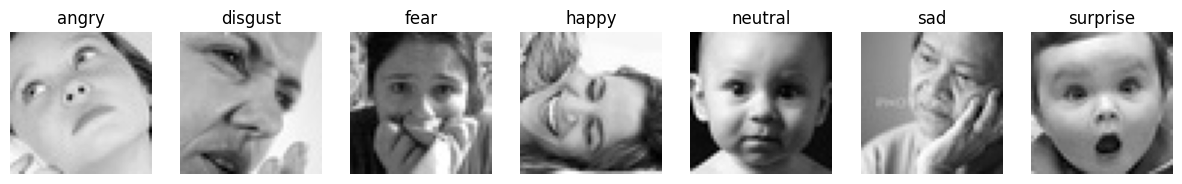

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Function to describe image properties
def get_image_properties(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    if image is None:
        return {"Error": "Could not load image"}

    # Calculate properties
    height, width = image.shape
    size = os.path.getsize(image_path)  # File size in bytes
    mean_intensity = image.mean()  # Mean pixel intensity
    min_intensity = image.min()  # Min pixel intensity
    max_intensity = image.max()  # Max pixel intensity

    return {
        "Dimensions": f"{width}x{height}",
        "File Size (KB)": f"{size / 1024:.2f}",
        "Mean Intensity": f"{mean_intensity:.2f}",
        "Min Intensity": min_intensity,
        "Max Intensity": max_intensity,
    }

# Verify if the training folder exists
if not os.path.exists(train_path) or len(os.listdir(train_path)) == 0:
    print("The training folder is not found. Please check the dataset structure.")
else:
    print("Visualizing dataset examples...")

    # List available classes
    classes = os.listdir(train_path)
    classes.sort()  # Ensure classes are in alphabetical order
    print(f"Classes found: {classes}")

    print("Visualizing examples from each class with properties:")
    # Display an example from each class with properties
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
    for i, class_name in enumerate(classes):
        class_folder = os.path.join(train_path, class_name)
        if os.path.isdir(class_folder):
            # Get the first image from the class
            example_image_path = os.path.join(class_folder, os.listdir(class_folder)[0])
            image = cv2.imread(example_image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

            # Display the image
            axes[i].imshow(image, cmap="gray")
            axes[i].axis("off")
            axes[i].set_title(class_name)

            # Get and print image properties
            properties = get_image_properties(example_image_path)
            print(f"\nClass: {class_name}")
            for prop, value in properties.items():
                print(f"{prop}: {value}")

    plt.show()

## Preparación de los datos para el entrenamiento

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore

# Data augmentation for training
data_augmentation = ImageDataGenerator(
    rotation_range=20,          # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,      # Horizontal shift up to 20%
    height_shift_range=0.2,     # Vertical shift up to 20%
    shear_range=0.15,           # Shearing transformation
    zoom_range=0.2,             # Random zoom
    horizontal_flip=True,       # Flip images horizontally
    fill_mode='nearest',        # Fill in missing pixels after transformation
    rescale=1./255,             # Normalize pixel values to [0, 1]
    validation_split=0.2        # Reserve 20% of data for validation
)

# Training data generator
train_generator = data_augmentation.flow_from_directory(
    directory=train_path,       # Path to the training dataset
    target_size=(96, 96),       # Resize images to 96x96
    color_mode="grayscale",     # Load as grayscale images
    batch_size=32,              # Batch size
    class_mode="categorical",   # Multi-class classification
    subset="training",          # Use the "training" subset
    shuffle=True                # Shuffle data for training
)

# Validation data generator (uses the same augmentation instance with the "validation" subset)
validation_generator = data_augmentation.flow_from_directory(
    directory=train_path,
    target_size=(96, 96),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"         # Use the "validation" subset
)

# Test data generator (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(96, 96),       # Resize test images to 96x96
    color_mode="grayscale",     # Load as grayscale images
    batch_size=32,              # Batch size
    class_mode="categorical"    # Multi-class classification
)

# Display information about the detected classes
print(f"Classes detected: {train_generator.class_indices}")

Iniciando el preprocesamiento de datos...
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Clases detectadas: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


### Verificacion del balance de clases

In [ ]:
from collections import Counter

# Obtener el mapeo de índices a nombres de clases
class_indices = train_generator.class_indices  # Diccionario {nombre_clase: índice_clase}
index_to_class = {v: k for k, v in class_indices.items()}  # Invertir el diccionario

# Contar las clases
class_counts = Counter(train_generator.classes)

# Ordenar por índice de clase y mostrar con nombres
print("Distribución de clases en entrenamiento:")
for class_index, count in sorted(class_counts.items()):
    class_name = index_to_class[class_index]  # Obtener el nombre asociado al índice
    print(f"{class_name}: {count} muestras")  

Distribución de clases en entrenamiento:
angry: 3196 muestras
disgust: 349 muestras
fear: 3278 muestras
happy: 5772 muestras
neutral: 3972 muestras
sad: 3864 muestras
surprise: 2537 muestras


### Cálculo de pesos del desbalance de clases

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Obtain class names and indices from the train generator
class_indices = train_generator.class_indices  # Class-to-index mapping
class_labels = list(class_indices.keys())  # Class names
class_indices_inverted = {v: k for k, v in class_indices.items()}  # Index-to-class mapping

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array(list(class_indices.values())),  # Use consistent class indices
    y=train_generator.classes
)

# Map weights to class labels
class_weights_dict = {class_indices_inverted[i]: weight for i, weight in enumerate(class_weights)}

# Print the computed weights
print("Class Weights:")
for class_name, weight in class_weights_dict.items():
    print(f"{class_name}: {weight:.2f}")

Pesos de las clases:
angry: 1.03
disgust: 9.40
fear: 1.00
happy: 0.57
neutral: 0.83
sad: 0.85
surprise: 1.29


### Visualización de la distribución de pesos

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

class_counts = Counter(train_generator.classes)
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.show()

## Entrenamiento del modelo

In [ ]:
import tensorflow as tf
print("Dispositivos disponibles:")
print(tf.config.list_physical_devices('GPU'))

Dispositivos disponibles:
[]


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Configuración de memoria dinámica en GPU habilitada.")
    except RuntimeError as e:
        print(e)


### Importación de arquitectura base de EfficentNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Dense, Dropout, Flatten, GlobalAveragePooling2D

# Bloque residual corregido
def residual_block(x, filters):
    # Atajo (shortcut) para igualar las dimensiones si es necesario
    shortcut = Conv2D(filters, (1, 1), padding='same', activation=None)(x) if x.shape[-1] != filters else x
    shortcut = BatchNormalization()(shortcut)  # Normalización en el atajo

    # Bloque convolucional principal
    x = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Suma del atajo con la salida principal
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Entrada
inputs = Input(shape=(48, 48, 1))  # Escala de grises
x = Conv2D(3, (1, 1), activation='relu')(inputs)  # Convertir a 3 canales para EfficientNet

# Cargar el modelo preentrenado
base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(48, 48, 3),
    include_top=False
)
base_model.trainable = False  # Congelar capas base

x = base_model(x)

# Bloques residuales adicionales
x = residual_block(x, 256)
x = Dropout(0.5)(x)

# Salida
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(7, activation='softmax')(x)

# Modelo final
model = Model(inputs, outputs)

### Compilación del modelo

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen del modelo
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 48, 48, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 48, 48, 3)      │              6 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb0            │ (None, 2, 2, 1280)     │      4,049,571 │ conv2d_3[0][0]         │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 2, 2, 256)      │      2,949,376 │ efficientnetb0[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 2, 2, 256)      │          1,024 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 2, 2, 256)      │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 2, 2, 256)      │        590,080 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 2, 2, 256)      │        327,936 │ efficientnetb0[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 2, 2, 256)      │          1,024 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 2, 2, 256)      │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 2, 2, 256)      │              0 │ batch_normalization_4… │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 2, 2, 256)      │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2, 2, 256)      │              0 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 256)            │              0 │ dropout[0][0]          │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         32,896 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense[0][0]            │
├──────────────────────

 Total params: 7,953,840 (30.34 MB)

 Trainable params: 3,902,733 (14.89 MB)

 Non-trainable params: 4,051,107 (15.45 MB)

### Configuración de callbacks: Early stopping, un learning rate reducer y guardado del modelo para posterior uso

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='./residual_cnn_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

### Entrenamiento del modelo personalizado

In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    class_weight=class_weights_dict
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

# Confirmar que el modelo se ha guardado
print(f"Modelo guardado en: {model_checkpoint.filepath}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1459 - loss: 2.0950
Epoch 1: val_loss improved from inf to 1.94552, saving model to ./residual_cnn_model.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 821s 1s/step - accuracy: 0.1459 - loss: 2.0949 - val_accuracy: 0.1392 - val_loss: 1.9455 - learning_rate: 1.0000e-04
Epoch 2/50
433/718 ━━━━━━━━━━━━━━━━━━━━ 5:12 1s/step - accuracy: 0.1413 - loss: 1.9365

KeyboardInterrupt: 

## Visualización de los resultados

In [ ]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generar predicciones en el conjunto de prueba
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print("Matriz de Confusión:")
print(cm)

# Reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Reporte de Clasificación:")
print(report)